# Regridding and Climatology
This notebook contains a regridding of the livneh dataset to 0.5° gridding. It also contains some climatology analysis - specifically we look into the average SWE over the course of the winter, with the ultimate goal of subsetting to different watershed basin regions

In [1]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # custom layouts
import pandas as pd
import dask
import bottleneck
import netCDF4
import datetime as dt
import matplotlib
from glob import glob

In [3]:
# Seasonal SWE
ds = xr.open_mfdataset("/Users/julianschmitt/Downloads/NOAA/liveneh_swe/*.nc")
#ds = ds.groupby('time.dayofyear').mean('time')

In [5]:
# regrid files to 1/2 degree
lat_new = np.arange(25, 53, 0.5)
lon_new = np.arange(235.5, 293, 0.5)

t_low  = xr.open_mfdataset("/Users/julianschmitt/Downloads/NOAA/liveneh_swe/*.nc")
t_high = xr.open_mfdataset("/Users/julianschmitt/Downloads/NOAA/liveneh_swe/*.nc")
prec   = xr.open_mfdataset("/Users/julianschmitt/Downloads/NOAA/liveneh_swe/*.nc")

# regrid
t_low_r = t_low.reindex(lat = lat_new, lon = lon_new, method='nearest')
t_high_r = t_high.reindex(lat = lat_new, lon = lon_new, method='nearest')
prec_r = prec.reindex(lat = lat_new, lon = lon_new, method='nearest')

# save
t_low_r.to_netcdf("/Users/julianschmitt/Downloads/NOAA/climatology/t_low_regridded.nc")
t_high_r.to_netcdf("/Users/julianschmitt/Downloads/NOAA/climatology/t_high_regridded.nc")
prec_r.to_netcdf("/Users/julianschmitt/Downloads/NOAA/climatology/prec_regridded.nc")

/Users/julianschmitt/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xarray/core/indexing.py:1385: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


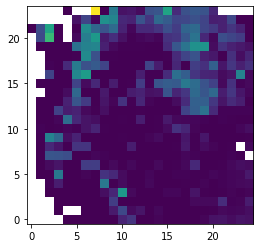

In [22]:
plt.imshow(t_low_r.reindex  swe[0, 25:49, -130:-90], origin='lower')

In [4]:
x = ds.lon[:]
y = ds.lat[:]

latbounds = [32 , 55]
lonbounds = [235 , 255]
# latitude lower and upper index
lat_lower = np.argmin(np.abs(y.data - latbounds[0]))
lat_upper = np.argmin(np.abs(y.data - latbounds[1])) 

# longitude lower and upper index
lon_lower = np.argmin(np.abs(x.data - lonbounds[0]))
lon_upper = np.argmin(np.abs(x.data - lonbounds[1]))

snow_cmap = matplotlib.cm.get_cmap('Blues_r')
snow_cmap.set_bad(color='gray')

rain_cmap = matplotlib.cm.get_cmap('Greens')
rain_cmap.set_bad(color='gray')

temp_cmap = matplotlib.cm.get_cmap('coolwarm')
temp_cmap.set_bad(color='gray')

<ipython-input-4-3d93de483b52>:15: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues_r").copy()
  snow_cmap.set_bad(color='gray')
<ipython-input-4-3d93de483b52>:18: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Greens").copy()
  rain_cmap.set_bad(color='gray')
<ipython-input-4-3d93de483b52>:21: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To 

/Users/julianschmitt/opt/anaconda3/envs/py38/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


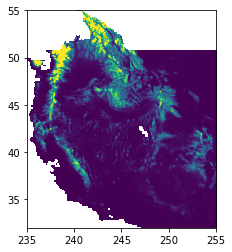

In [7]:
plt.imshow(ds.swe[0,lat_lower:lat_upper, lon_lower:lon_upper],  origin='lower', 
               cmap=snow_cmap, aspect="equal", vmin=0, vmax=500,
               extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))

In [39]:
WUS_swe_avg = np.array(ds.swe[:, lat_lower:lat_upper, lon_lower:lon_upper].mean(dim=["lat","lon"], skipna=True))

/Users/julianschmitt/opt/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


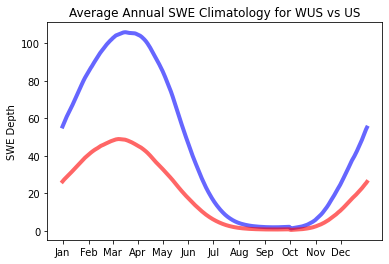

In [47]:
plt.plot(WUS_swe_avg, color="blue", alpha=0.6, linewidth = 4,label="WUS")
plt.plot(US_swe_avg, color='red', alpha=0.6, linewidth=4, label="US")
plt.ylabel("SWE Depth")
plt.xticks([0, 32, 60, 90, 120, 151, 181, 212, 243, 273, 304, 334], 
            ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Average Annual SWE Climatology for WUS vs US");
#plt.savefig("../plots/climatology/swe_depth_mean.png", dpi=200)

# Resample Yearly Dataset to 0.5° Grid
Leverage Xray functions - should be straightforward

In [8]:
# define new grid based on 0.5 degree lat-lon coordinates
lat_new = np.arange(25, 53, 0.5)
lon_new = np.arange(235.5, 293, 0.5)
#ds_low = ds.reindex(lat = lat_new, lon = lon_new, method='nearest').load() # takes a long time to run! 
ds_low.to_netcdf('/Users/julianschmitt/Downloads/NOAA/climatology/reindexed_jday_raw.nc')

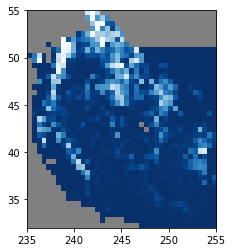

In [62]:
# lower grid indexing
x = ds_low.lon[:]
y = ds_low.lat[:]

latbounds = [32 , 55]
lonbounds = [235 , 255]
# latitude lower and upper index
lat_lower = np.argmin(np.abs(y.data - latbounds[0]))
lat_upper = np.argmin(np.abs(y.data - latbounds[1])) 

# longitude lower and upper index
lon_lower = np.argmin(np.abs(x.data - lonbounds[0]))
lon_upper = np.argmin(np.abs(x.data - lonbounds[1]))

plt.imshow(ds_low.swe[0,lat_lower:lat_upper, lon_lower:lon_upper],  origin='lower', 
               cmap=snow_cmap, aspect="equal", vmin=0, vmax=500,
               extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))

In [89]:
# get std by day
#ds.reindex(lat=lat_new, lon=lon_new, method='nearest').mean(dim=['lat', 'lon'], skipna=True).to_netcdf("/Users/julianschmitt/Downloads/NOAA/climatology/reindexed_jday_std.nc")
ds_reindex_mean = xr.load_dataset('/Users/julianschmitt/Downloads/NOAA/climatology/reindexed_jday_std.nc')
ds_std = ds_reindex_mean.groupby('time.dayofyear').std('time')
stds = ds_std.to_array()
ds_std_WUS = xr.load_dataset('/Users/julianschmitt/Downloads/NOAA/climatology/reindexed_jday_std_WUS.nc').groupby('time.dayofyear').std('time')
stds_WUS = ds_std.to_array()

In [93]:
# switch arrays to start on OCT 1: JDAY = 275
from collections import deque 


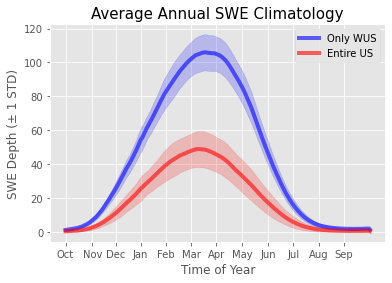

In [100]:
# plot SWE lines
plt.plot(np.roll(WUS_swe_avg, -274), color="blue", alpha=0.6, linewidth = 4,label="Only WUS")
plt.plot(np.roll(US_swe_avg, -274), color='red', alpha=0.6, linewidth=4, label="Entire US")
# label xticks
plt.xticks([0, 32, 60, 90, 120, 151, 181, 212, 243, 273, 304, 334], 
            ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep'])

# add SD bars
plt.fill_between(np.arange(0,366), np.roll(np.array(US_swe_avg-stds)[0], -274), 
                 np.roll(np.array(US_swe_avg+stds)[0],-274), color='red', alpha=0.2)
plt.fill_between(np.arange(0,366), np.roll(np.array(WUS_swe_avg-stds_WUS)[0], -274), 
                 np.roll(np.array(WUS_swe_avg+stds_WUS)[0], -274), color='blue', alpha=0.2)

# labels and styling
plt.title("Average Annual SWE Climatology", fontsize=15);
plt.ylabel("SWE Depth (± 1 STD)")
plt.xlabel("Time of Year")
plt.style.use('ggplot')
plt.legend()

plt.savefig("../plots/climatology/swe_depth_mean2.png", dpi=200) # save fig


## Look at Basin Level Climatology
We use shapefiles to add some much needed granualarity to this analysis. We focus in on to the basin level - looking at changes to SWE across different basins. 

In [46]:
# additional packages for shapefiles
import os
from shapely import wkb, wkt
from shapely.geometry import Point, shape, Polygon, MultiPolygon
from descartes import PolygonPatch
from matplotlib.collections import PatchCollection
from rasterio import features
import fiona
import geopandas
import regionmask # for selecting regions from xarray

In [14]:
HUC2 = fiona.open("/Users/julianschmitt/Downloads/NOAA/basin_shp_files/R17/WBDHU2.shp", 'r')

In [149]:
# for some reason we have to buffer polygons for them to be valid - 0 additional distance
rootdir = "/Users/julianschmitt/Downloads/NOAA/basin_shp_files/"
poly = []
for ind in range(1, 19):
    fpath = os.path.join(rootdir, f"R{ind}/WBDHU2.shp")
    print(fpath)
    try:
        poly.append(Polygon(fiona.open(fpath, 'r')[0]['geometry']['coordinates'][0]).buffer(0))
    except ValueError:
        poly.append(Polygon(fiona.open(fpath,'r')[0]['geometry']['coordinates'][0][0]).buffer(0))
    #poly.append(Polygon(fiona.open(fpath, 'r')[0]['geometry']['coordinates'][0]).buffer(0))
MP = MultiPolygon(poly)

/Users/julianschmitt/Downloads/NOAA/basin_shp_files/R1/WBDHU2.shp
/Users/julianschmitt/Downloads/NOAA/basin_shp_files/R2/WBDHU2.shp
/Users/julianschmitt/Downloads/NOAA/basin_shp_files/R3/WBDHU2.shp
/Users/julianschmitt/Downloads/NOAA/basin_shp_files/R4/WBDHU2.shp
/Users/julianschmitt/Downloads/NOAA/basin_shp_files/R5/WBDHU2.shp
/Users/julianschmitt/Downloads/NOAA/basin_shp_files/R6/WBDHU2.shp
/Users/julianschmitt/Downloads/NOAA/basin_shp_files/R7/WBDHU2.shp
/Users/julianschmitt/Downloads/NOAA/basin_shp_files/R8/WBDHU2.shp
/Users/julianschmitt/Downloads/NOAA/basin_shp_files/R9/WBDHU2.shp
/Users/julianschmitt/Downloads/NOAA/basin_shp_files/R10/WBDHU2.shp
/Users/julianschmitt/Downloads/NOAA/basin_shp_files/R11/WBDHU2.shp
/Users/julianschmitt/Downloads/NOAA/basin_shp_files/R12/WBDHU2.shp
/Users/julianschmitt/Downloads/NOAA/basin_shp_files/R13/WBDHU2.shp
/Users/julianschmitt/Downloads/NOAA/basin_shp_files/R14/WBDHU2.shp
/Users/julianschmitt/Downloads/NOAA/basin_shp_files/R15/WBDHU2.shp
/Use

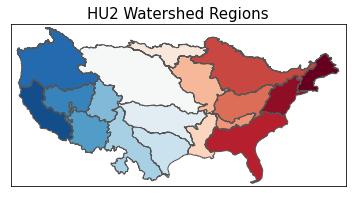

In [150]:
cm = plt.get_cmap('RdBu')

num_colours = len(MP)

# define plot and add boundaries
fig = plt.figure()
ax = fig.add_subplot(111)
minx, miny, maxx, maxy = MP.bounds
w, h = maxx - minx, maxy - miny
ax.set_xlim(minx - 0.02 * w, maxx + 0.02 * w)
ax.set_ylim(miny - 0.02 * h, maxy + 0.02 * h)
ax.set_aspect(1)

patches = []
for idx, p in enumerate(MP):
    colour = cm(1. * idx / num_colours)
    patches.append(PolygonPatch(p, fc=colour, ec='#555555', alpha=1., zorder=1))
ax.add_collection(PatchCollection(patches, match_original=True))
ax.set_xticks([])
ax.set_yticks([])
plt.title("HU2 Watershed Regions", fontsize=15)
#plt.savefig('../../plots/HU2_regions.png', dpi=300)
plt.show()

## Mask SWE Data by Watershed
We now select SWE data by watershed using `regionmask`.
Found `https://regionmask.readthedocs.io/en/v0.5.0/notebooks/mask_xarray.html` to be very helpful.

In [151]:
# extract names and region labels for mask
names, huc2_region = [], []
for ind in range(1, 19):
    fpath = os.path.join(rootdir, f"R{ind}/WBDHU2.shp")
    names.append(fiona.open(fpath, 'r')[0]['properties']['Name'])
    huc2_region.append(fiona.open(fpath, 'r')[0]['properties']['HUC2'])
print(names)

['New England Region', 'Mid Atlantic Region', 'South Atlantic-Gulf Region', 'Great Lakes Region', 'Ohio Region', 'Tennessee Region', 'Upper Mississippi Region', 'Lower Mississippi Region', 'Souris-Red-Rainy Region', 'Missouri Region', 'Arkansas-White-Red Region', 'Texas-Gulf Region', 'Rio Grande Region', 'Upper Colorado Region', 'Lower Colorado Region', 'Great Basin Region', 'Pacific Northwest Region', 'California Region']


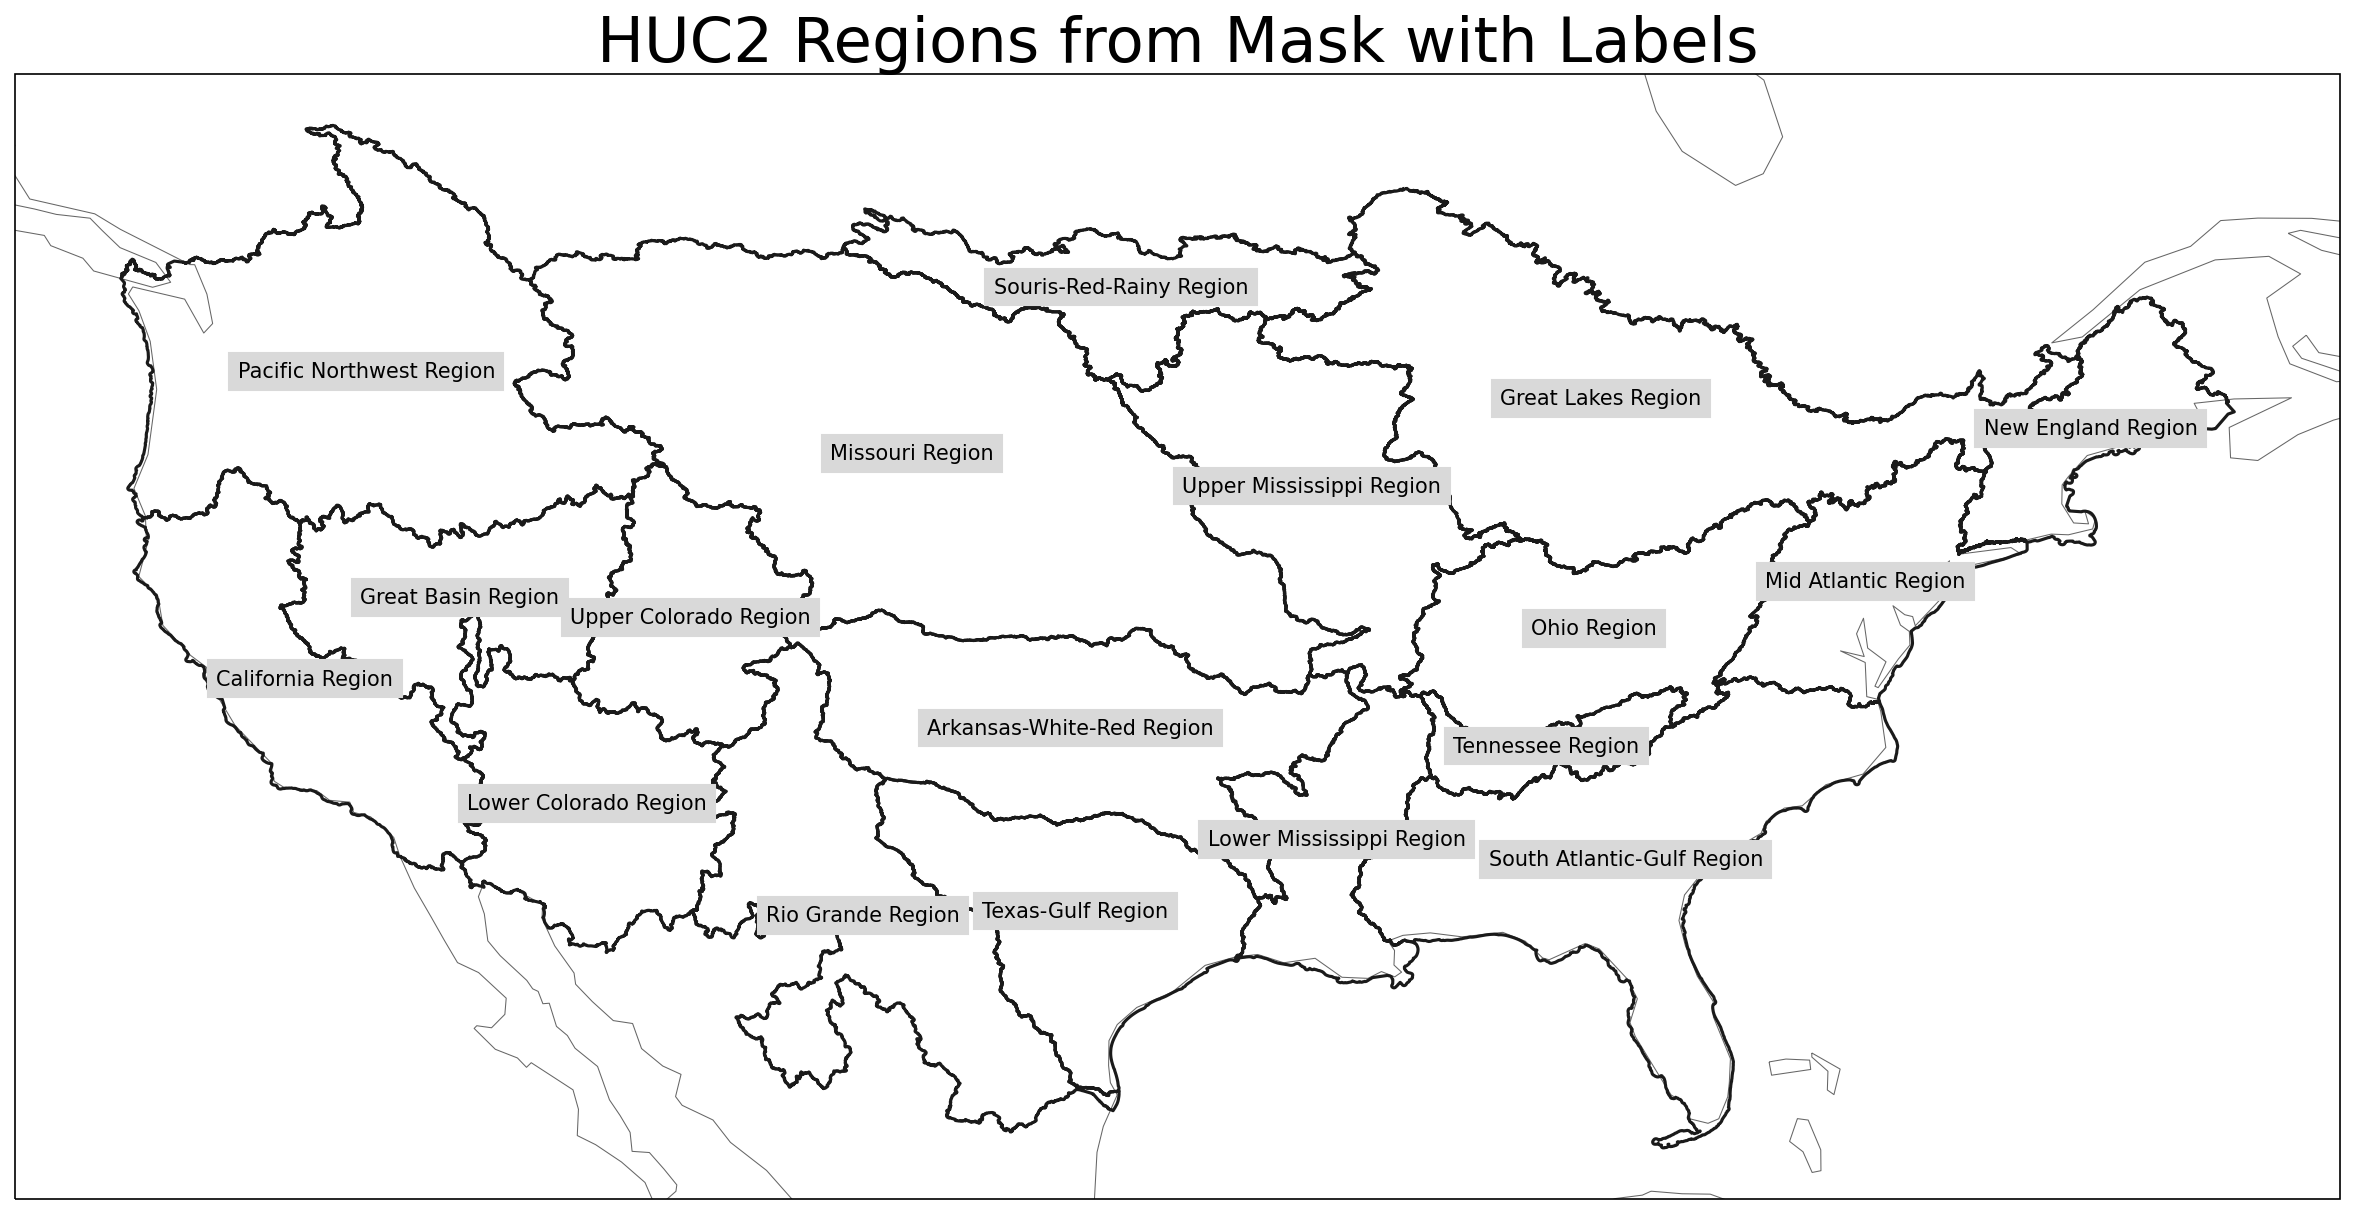

In [152]:
from matplotlib.pyplot import figure
figure(figsize=(20, 15), dpi=150)

# convert shapes to mask
RM = regionmask.Regions(MP, names = names, abbrevs=huc2_region)

# plot mask 
RM.plot(label="name")
plt.title("HUC2 Regions from Mask with Labels", fontsize=30)
plt.savefig("../../plots/HUC2_with_labels_from_mask.png", dpi=200)

In [171]:
# load dataset and roll lat coords to be in (0, 360)
ds_low = xr.open_dataset('/Users/julianschmitt/Downloads/NOAA/climatology/reindexed_jday_raw.nc')
ds_low =ds_low.roll(roll_coords=True)

In [172]:
# construct mask to go over lat lons from dataset
lats = np.array(ds_low.lat)
lons = np.array(ds_low.lon)

mask = RM.mask(lons, lats)

ds_low['mask'] = mask # add mask to ds

# add region names and abbreviation codes to dataset
# ds_low = ds_low.assign_coords(abbrevs = ("mask", RM.abbrevs))
# ds_low = ds_low.assign_coords(regions = ("mask", RM.names))

In [173]:
ds_mask = ds_low.groupby('mask').mean()
ds_mask

<xarray.Dataset>
Dimensions:    (dayofyear: 366, mask: 18)
Coordinates:
  * mask       (mask) float64 0.0 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0 16.0 17.0
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Data variables:
    swe        (mask, dayofyear) float32 74.13 76.16 78.4 ... 33.12 33.98 39.4

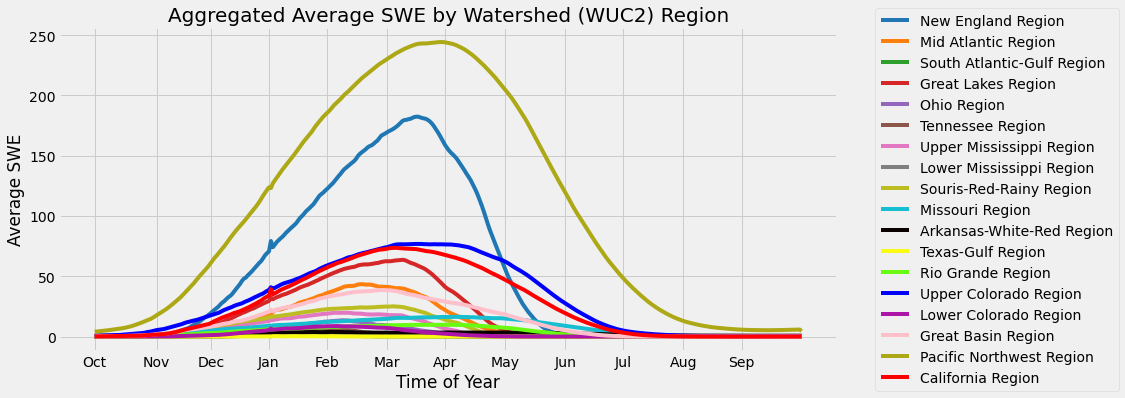

In [231]:
#ds_mask.swe[0]
plt.style.use('fivethirtyeight')


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#080100','#f9fc12',
         '#68fc12','b','#ad15a8','pink','#ada815','r']
fig = plt.figure(figsize=(18, 6))
ax = fig.add_axes([0.15, 0.15, 0.6, 0.75])
for ind, mask in enumerate(range(0,18)):
    # select region mask 
    region_data = np.roll(np.array(ds_mask[dict(mask=mask)].swe), -274)
    ax.plot(region_data, label = RM.names[ind], color=colors[ind%len(colors)])
ax.legend(bbox_to_anchor=(1.04,1.08), loc="upper left")
plt.xticks([0, 32, 60, 90, 120, 151, 181, 212, 243, 273, 304, 334], 
            ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep'])
plt.xlabel("Time of Year")
plt.ylabel("Average SWE")
plt.title("Aggregated Average SWE by Watershed (WUC2) Region", fontsize=20)
plt.savefig("../../plots/agg_avg_swe_by_wuc2.png", dpi=200)
plt.show()


In [163]:
ds.assign_coords(abbrevs = ("mask", RM.abbrevs))
ds.assign_coords(regions = ("mask", RM.names))

<xarray.Dataset>
Dimensions:    (dayofyear: 366, lat: 444, lon: 922, mask: 18)
Coordinates:
  * lat        (lat) float64 25.16 25.22 25.28 25.34 ... 52.66 52.72 52.78 52.84
  * lon        (lon) float64 235.4 235.5 235.5 235.6 ... 292.8 292.8 292.9 293.0
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
    abbrevs    (mask) <U2 '01' '02' '03' '04' '05' ... '14' '15' '16' '17' '18'
Dimensions without coordinates: mask
Data variables:
    swe        (dayofyear, lat, lon) float32 dask.array<chunksize=(1, 444, 922), meta=np.ndarray>

In [88]:
#PNW = RM['Pacific Northwest Region'] # select single region
#ds_low.within(RM['Pacific Northwest Region'])
#ds_low.where(mask = RM["Pacific Northwest Region"]) # regionmask docs did this but method no longer exists
#ds_low.groupby(RM) # I'd like to be able to group by region 

# ds_low.groupby(RM)
PNW = ds_low.where(ds_low.roll().isin(RM["Pacific Northwest Region"])).swe[0] # all NaNs 


<ipython-input-88-2b7456751083>:7: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  PNW = ds_low.where(ds_low.roll().isin(RM["Pacific Northwest Region"])).swe[0] # all NaNs


In [105]:
ds_roll = ds_low.roll(roll_coords=True)
PacificNW = ds_roll.where(ds_roll.isin(RM["Pacific Northwest Region"]))

In [33]:
airtemps = xr.tutorial.load_dataset('air_temperature')
airtemps.isin(RM['Pacific Northwest Region'])

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) bool False False False False ... False False False